### Overview

We will use the tips dataset (via seaborn) to practice linear regression with categorical predictors, interpret coefficients (including the intercept), and discuss a numeric×categorical interaction. The tips dataset contains observational records of restaurant tipping behavior collected from a single restaurant.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Get the data (Python)

tips = sns.load_dataset("tips").dropna()
tips["tip_pct"] = tips["tip"] / tips["total_bill"]

tips

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204


#### Variables of interest

- Numeric:
  - tip
  - total_bill
  - tip_pct = tip/total_bill
  - size

- Categorical:
  - sex (Female/Male)
  - smoker (Yes/No)
  - day (Thur/Fri/Sat/Sun)
  - time (Lunch/Dinner)

### Part A: Setup and EDA (10 min)

### A1. [1 pt]

Choose your target variable: tip or tip_pct. Justify briefly

Answer:

- Tipping behavior is best analyzed as a percentage of the bill rather than the raw tip amount.

- Using the tip in dollars can be misleading because larger bills naturally lead to larger tips.

- Calculating tip_pct captures tipping habits independent of the total spent and removes the built-in positive correlation between tip and bill size.

  - This measure better reflects tipping generosity and is roughly scale-free, which also helps satisfy linear-model assumptions.

### A2. [2 pts]

Explore the data with visualizations (e.g., a heatmap of pairwise correlations among numeric variables and a scatter of tip_pct vs total_bill). Include a brief takeaway

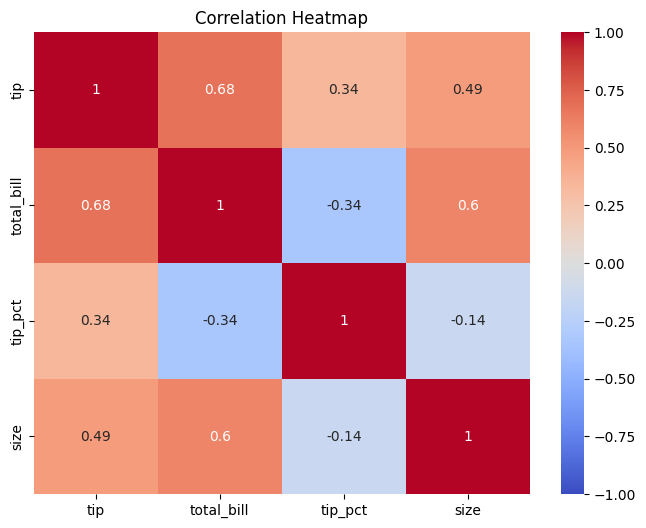

In [ ]:
# 1. Heatmap of numeric correlations

# Compute correlation matrix
corr_matrix = tips.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(tips[["tip", "total_bill", "tip_pct", "size"]].corr(),
            annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()


### Key Takeaways :

- Correlation matrix :

  - tip and total_bill show a strong positive correlation (0.68), which makes sense since larger bills tend to result in larger absolute tips.

  - size and total_bill are positively correlated (0.59), indicating that larger groups tend to spend more.

  - tip_pct and total_bill have a moderate negative correlation (-0.34), suggesting that as the bill increases, the tip percentage tends to decrease slightly. This implies that customers may tip less generously on higher bills.

  - tip_pct and size show a weak negative correlation (-0.14), meaning larger parties might tip a smaller percentage on average.

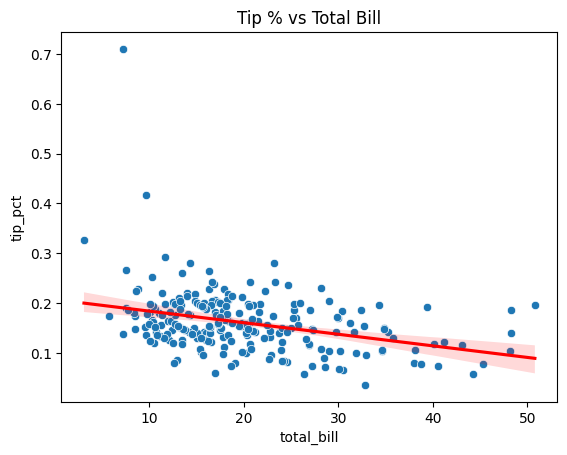

In [ ]:
# 2. Scatter of tip_pct vs total_bill
sns.scatterplot(x="total_bill", y="tip_pct", data=tips)
sns.regplot(x="total_bill", y="tip_pct", data=tips, scatter=False, color="red")
plt.title("Tip % vs Total Bill")
plt.show()

### Key Takeaways :

- Scatterplot :

  - The scatter plot shows a clear negative trend between total_bill and tip_pct, as indicated by the downward-sloping regression line.
  
  - This suggests that as the total bill increases, the tip percentage tends to decrease.
  
  - The shaded confidence interval around the line confirms that this trend is statistically meaningful, though not perfectly linear.

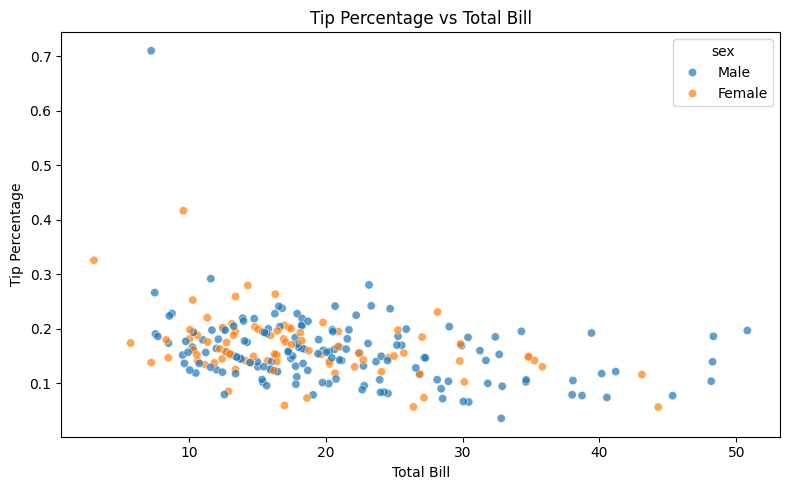

In [ ]:
# Scatter Plot of tip_pct vs total_bill

plt.figure(figsize=(8, 5))
sns.scatterplot(data=tips, x='total_bill', y='tip_pct', hue='sex', alpha=0.7)
plt.title('Tip Percentage vs Total Bill')
plt.xlabel('Total Bill')
plt.ylabel('Tip Percentage')
plt.tight_layout()
plt.show()

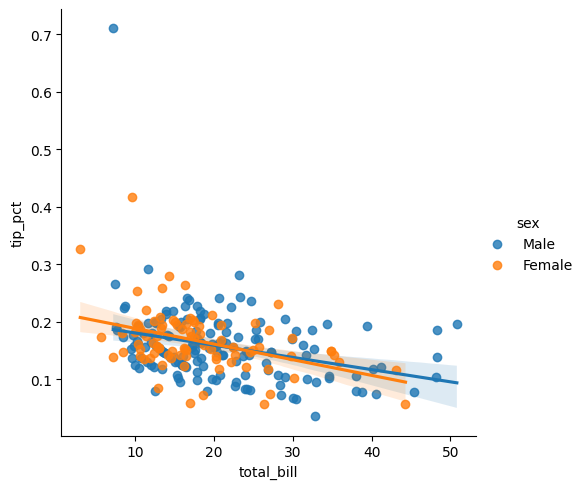

In [ ]:
# linearity and group differences combined

sns.lmplot(data=tips, x='total_bill', y='tip_pct', hue='sex')


### Key Takeaway :

- Gender does not drastically alter the overall tipping pattern, but there may be subtle differences in how tip percentages respond to bill size across groups.

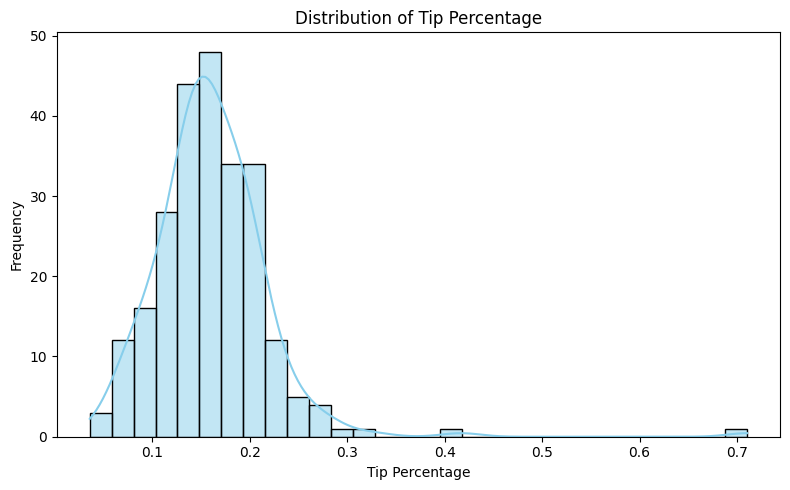

In [ ]:
# histogram to check the distribution of tip_pct

plt.figure(figsize=(8, 5))
sns.histplot(tips['tip_pct'], bins=30, kde=True, color='skyblue')

# Add labels and title
plt.xlabel('Tip Percentage')
plt.ylabel('Frequency')
plt.title('Distribution of Tip Percentage')
plt.tight_layout()
plt.show()

### Interpretation :

- The distribution of tip_pct is right-skewed, with most values concentrated between 10% and 25%.

- The peak occurs around 18%, suggesting that this is the most common tipping rate among customers.

- A few outliers tip above 40%, extending up to nearly 70%, which indicates occasional highly generous tipping behavior.

Key Takeaway :

- Most customers tip within a conventional range, centered around 15–20%.

<Axes: xlabel='day', ylabel='tip_pct'>

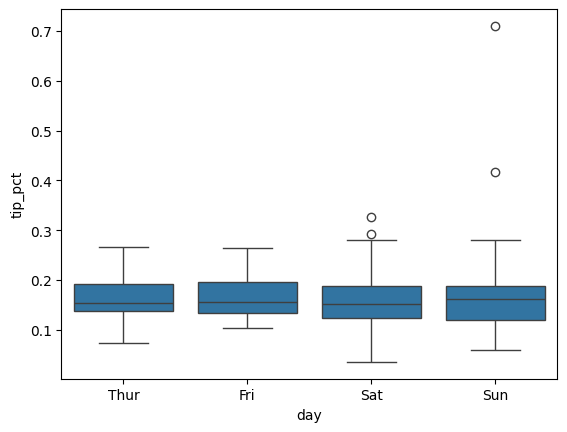

In [ ]:
# box plots for categorical variables - day

sns.boxplot(data=tips, x='day', y='tip_pct')


<Axes: xlabel='sex', ylabel='tip_pct'>

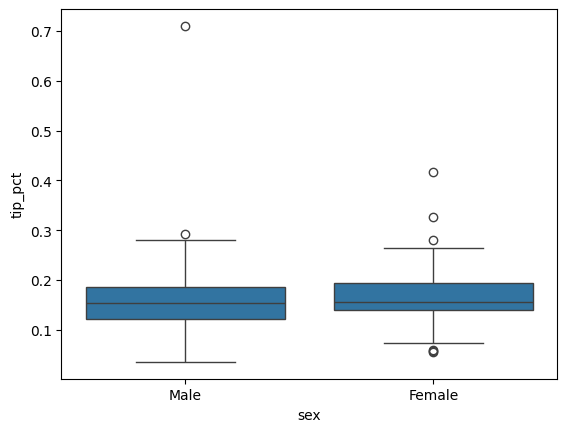

In [ ]:
# box plots for categorical variables - gender

sns.boxplot(data=tips, x='sex', y='tip_pct')



<Axes: xlabel='smoker', ylabel='tip_pct'>

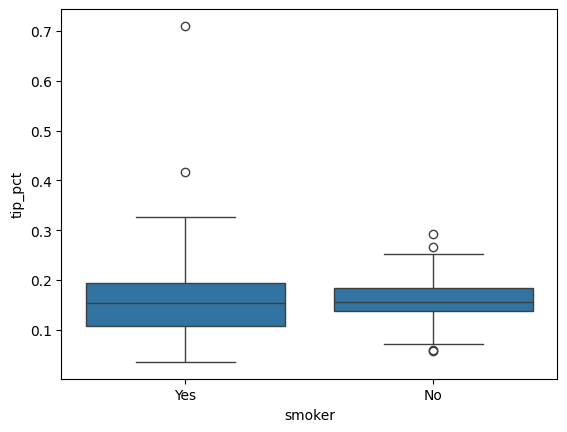

In [ ]:
# box plots for categorical variables - smoker

sns.boxplot(data=tips, x='smoker', y='tip_pct')

<Axes: xlabel='time', ylabel='tip_pct'>

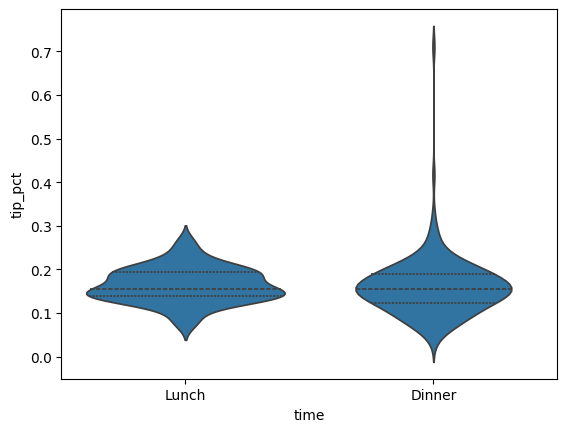

In [ ]:
# Show distribution and density of tip_pct across categories:

sns.violinplot(data=tips, x='time', y='tip_pct', inner='quartile')

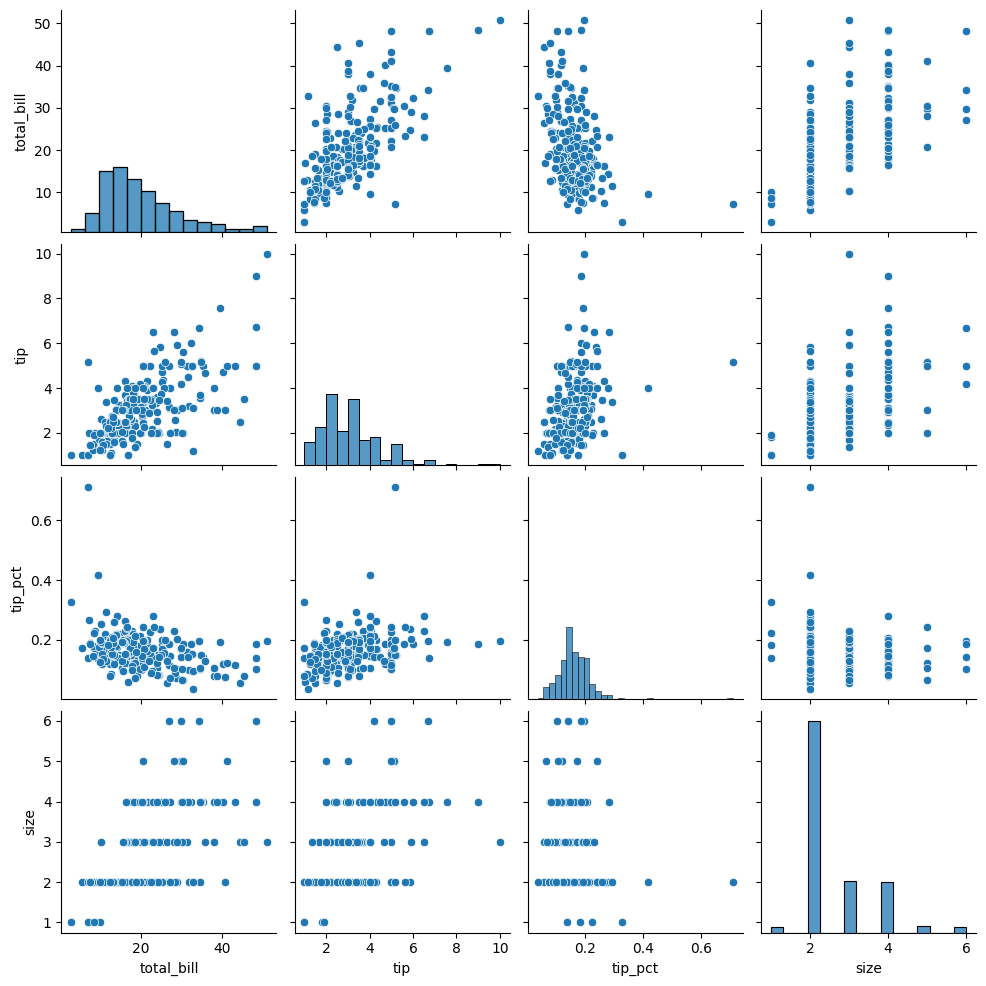

In [ ]:
# Visualize pairwise relationships among numeric variables:

sns.pairplot(tips[['total_bill', 'tip', 'tip_pct', 'size']])


### Part B: Categorical Predictors and Reference Levels (20min)

### B1. [2 pts]

Pick two categorical predictors and one numeric predictor; fit an additive linear model.

Example model (text form): tip_pct ~ total_bill + smoker + sex

Choose Predictors :

- Target (response): tip_pct (as decided in Part A)

- Numeric predictor: total_bill (continuous check size)

- Categorical predictors:

  - smoker (Yes / No)

  - sex (Male / Female)

Explanation :

- smoker could influence tipping habits (cultural/behavioral differences).

- sex may capture gender-related tipping differences.

- total_bill controls for any residual relationship between bill size and tip %.

In [ ]:
import statsmodels.formula.api as smf
import seaborn as sns

tips = sns.load_dataset("tips").dropna()
tips["tip_pct"] = tips["tip"] / tips["total_bill"]

model_b1 = smf.ols("tip_pct ~ total_bill + smoker + sex", data=tips).fit()

print(model_b1.summary())


                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     10.77
Date:                Sun, 28 Sep 2025   Prob (F-statistic):           1.15e-06
Time:                        23:59:04   Log-Likelihood:                 351.84
No. Observations:                 244   AIC:                            -695.7
Df Residuals:                     240   BIC:                            -681.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.2108      0.011     18.700

### Key Takeaway :

- The only strong predictor in this model is total_bill, which shows a consistent negative relationship with tip percentage.

- Neither smoker nor sex significantly improves the model, suggesting that tipping behavior is not strongly influenced by these demographic factors in this dataset.

### B2. [2 pts]

Explain why it might be useful to change the reference level of a categorical variable in a linear model. Change one or both of the reference levels and refit the model. (Here is how you can change the reference level using statsmodels:)

In [ ]:
# Refitting the Model with Custom Reference Levels


# Refit model with "Yes" as the reference level for smoker

model_refit = smf.ols(
    "tip_pct ~ total_bill + C(smoker, Treatment(reference='Yes'))",
    data=tips
).fit()

print(model_refit.summary())

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     16.16
Date:                Sun, 28 Sep 2025   Prob (F-statistic):           2.59e-07
Time:                        23:59:07   Log-Likelihood:                 351.79
No. Observations:                 244   AIC:                            -697.6
Df Residuals:                     241   BIC:                            -687.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

Takeaway :

Changing the reference level for smoker doesn’t alter the model but makes the interpreation of coefficient of smoker easy.

In [ ]:
model_refit_1 = smf.ols(
    "tip_pct ~ total_bill + C(sex, Treatment(reference='Male')) + C(smoker, Treatment(reference='Yes'))",
    data=tips
).fit()

print(model_refit_1.summary())

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     10.77
Date:                Mon, 29 Sep 2025   Prob (F-statistic):           1.15e-06
Time:                        00:34:13   Log-Likelihood:                 351.84
No. Observations:                 244   AIC:                            -695.7
Df Residuals:                     240   BIC:                            -681.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

- Changing the reference levels clarifies the comparisons: we now interpret how females differ from males and how non-smokers differ from smokers.

- However, the only statistically significant predictor remains total_bill, reinforcing the earlier conclusion that bill size is the strongest driver of tip percentage in this model.

#### B3 [4 pts]

Interpretation:

(a) Intercept: Interpret the intercept in context. Is a total_bill=0 check plausible? How should we communicate this limitation?

(b) Categorical effect: Interpret one coefficient for a categorical predictor (e.g., smoker[Yes]) relative to its reference.

(c) Numeric slope: Interpret the coefficient of the numeric predictor (e.g., total_bill) in practical terms (change in tip_pct per $1)

### Intercept:

- The intercept is 0.2108, which represents the expected tip percentage for the reference group — in this case,
male smokers — when total_bill = 0.

- A total_bill = 0 is not plausible in real-world terms, since a customer cannot tip on a nonexistent bill. This value is a mathematical anchor for the regression line, not a realistic scenario


#### Limitation :

While the intercept provides a baseline for the model, it does not represent a meaningful real-world case, as a total bill of $0 is not possible. Interpretations should focus on relative changes rather than absolute predictions at this point.

### Categorical Effect:

smoker[T.No]

- The coefficient for smoker[T.No] is -0.0075, meaning non-smokers tip about 0.75 percentage points less than smokers, on average.

- However, the p-value is 0.324, indicating that this difference is not statistically significant.

We cannot confidently say that smoking status affects tipping behavior in this dataset.

### Numeric Slope:

total_bill

- The coefficient for total_bill is -0.0023, which means that for each additional $1 spent, the expected tip percentage decreases by 0.23 percentage points, holding other variables constant.

- This is statistically significant (p < 0.001) and aligns with earlier visualizations showing that customers tend to tip less generously (in percentage terms) as the bill increases.

### B4. [2 pts]

Comment on whether the overall model in B1 or B2 is useful in predicting the target? Justify your answer by citing a value in the model summary.

Answer :

- The overall model in B1/B2 has limited predictive power. The R-squared value is 0.119, meaning the model explains only 11.9% of the variance in tip_pct.

- This suggests that while total_bill is a statistically significant predictor, the model does not capture most of the variation in tipping behavior.

- Additional predictors or interaction terms may be needed to improve performance.

### B5. [3 pts]

Identify or compute and comment on the usefulness of this model in terms of Adjusted-R2 and RMSE

In [ ]:
# Get model metrics
r2 = model_b1.rsquared
n = model_b1.nobs
p = model_b1.df_model

# Calculate Adjusted R²
adjusted_r2 = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)

print(f"Adjusted R²: {adjusted_r2:.4f}")


Adjusted R²: 0.1077


In [ ]:
# Compute RMSE

import numpy as np

predictions = model_b1.predict(tips)
residuals = tips['tip_pct'] - predictions
rmse = np.sqrt(np.mean(residuals**2))
print(f"RMSE: {rmse:.4f}")


RMSE: 0.0572


### Comment :

- Adjusted R² = 0.1077
  - This means the model explains only 10.77% of the variation in tip percentage after accounting for the number of predictors.
  - This is quite low, indicating that the model has limited explanatory power and may not generalize well to new data.

- RMSE = 0.0572
  - The Root Mean Squared Error tells us that, on average, the model’s predictions are off by about 5.72 percentage points
  - Given that most tip percentages fall between 10% and 25%, this is a substantial error, suggesting that the model is not highly accurate for predicting individual tips.

In [ ]:
###

### Part C: Interaction (20 min) Discussion participation: [4 pts]


### C1.

Plot tip_pct vs total_bill with separate regression lines by smoker status. Do the lines appear to have different slopes (interaction) or mainly different heights (additive difference)?

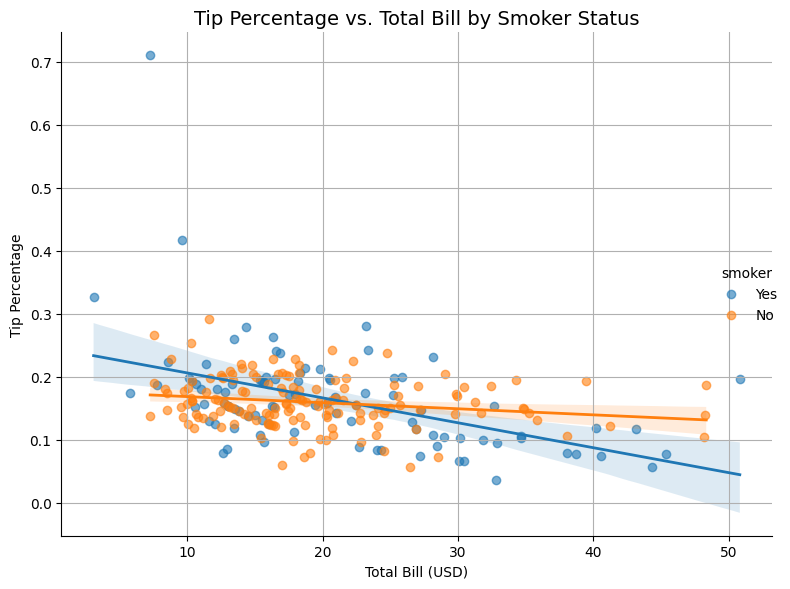

In [ ]:
# Create the scatterplot with regression lines
sns.lmplot(
    data=tips,
    x='total_bill',
    y='tip_pct',
    hue='smoker',
    height=6,
    aspect=1.2,
    scatter_kws={'alpha': 0.6},
    line_kws={'linewidth': 2}
)

# Customize the plot
plt.title('Tip Percentage vs. Total Bill by Smoker Status', fontsize=14)
plt.xlabel('Total Bill (USD)')
plt.ylabel('Tip Percentage')
plt.grid(True)
plt.tight_layout()
plt.show()


### Observations :

- Smokers:
  - The regression line has a steeper negative slope, indicating that as the total bill increases, smokers tip a smaller percentage of the bill. Their tipping behavior is more sensitive to bill size.

- Non-Smokers:
  - The regression line is much flatter, showing that non-smokers maintain a more consistent tip percentage regardless of how much they spend.

The difference is not just in height (intercept), but in slope, meaning the relationship between spending and tipping varies across groups.

### C2.

Fit the interaction model.

In [ ]:
# Fit the OLS model with interaction between total_bill and smoker
model = smf.ols(
    formula='tip_pct ~ total_bill + C(smoker) + total_bill:C(smoker)',
    data=tips
).fit()

# Print the regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     15.84
Date:                Mon, 29 Sep 2025   Prob (F-statistic):           1.97e-09
Time:                        01:05:52   Log-Likelihood:                 358.47
No. Observations:                 244   AIC:                            -708.9
Df Residuals:                     240   BIC:                            -695.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

### C3.

Write the fitted line for each group (e.g., Non-smoker vs Smoker).
Identify:
  - the group-specific intercept (at total_bill=0),
  - the group-specific slope with respect to total_bill.

model:

tip_pct ~ total_bill + C(smoker) + total_bill:C(smoker)

- Smoker :
  - Intercept : 0.2454
  - Slope : –0.0040
  - Fitted line : tip_pct = 0.2454 − 0.0040 × total_bill

- Non-Smoker :
  - Intercept : 0.2454 + (−0.0675) = 0.1779
  - Slope : − 0.0040 + 0.0030 = − 0.0010
  - Fitted Line: tip_pct = 0.1779 − 0.0010 × total_bill

### C4.

Why might it be useful to include an interaction term in a regression model?

Answer :

- Including an interaction term in a regression model allows us to test whether the effect of one predictor depends on the level of another.

- This is useful when relationships are not purely additive

- In our case, the interaction between total_bill and smoker showed that non-smokers tip more consistently across bill sizes, while smokers tip less as bills grow, w/o the interaction term, this nuance would be lost.

### C5.

If the interaction is significant, explain what different slopes imply about how total_bill relates to tip_pct across smoker groups. If not, argue for preferring the additive model

### Answer:

In this model, the interaction between total_bill and smoker is statistically significant (p = 0.000), which means the effect of total_bill on tip_pct differs across smoker groups.


What Different Slopes Imply:

- For smokers, tip percentage decreases more steeply as the total bill increases (slope = –0.0040).

- For non-smokers, the decline is much gentler (slope = –0.0010).

- This suggests that smokers reduce their tipping percentage more aggressively as bills grow, while non-smokers maintain more consistent tipping behavior.

### Part D: Reflection (Not Graded)

For both models (additive and interaction):

### D1.

Check residuals vs fitted. Any signs of nonlinearity or non-constant variance?

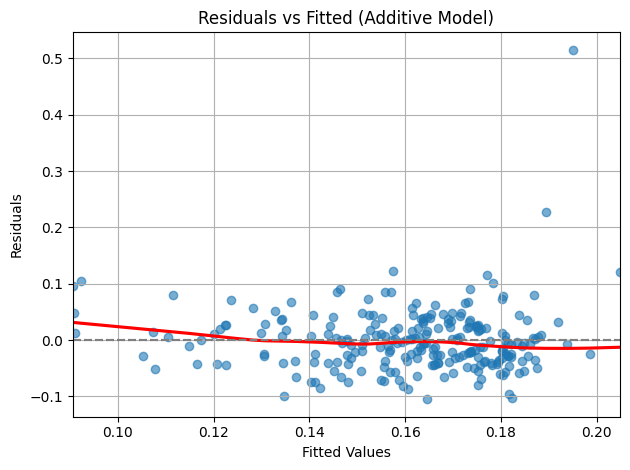

In [ ]:
# Fit additive model
model_add = smf.ols('tip_pct ~ total_bill + C(smoker)', data=tips).fit()

# Add fitted values and residuals
tips['fitted_add'] = model_add.fittedvalues
tips['resid_add'] = model_add.resid

# Plot residuals vs fitted
sns.residplot(x='fitted_add', y='resid_add', data=tips, lowess=True,
              scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})
plt.title('Residuals vs Fitted (Additive Model)')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.axhline(0, color='gray', linestyle='--')
plt.grid(True)
plt.tight_layout()
plt.show()

### Interpretation :

- The errors in this model are more evenly spread out across the predicted values. That’s a good sign — it means the model isn’t consistently over- or under-predicting in any particular range.

- The red trend line is fairly flat, which tells us there’s no strong pattern or curve in the residuals. That suggests the model is capturing the relationship between variables pretty well.

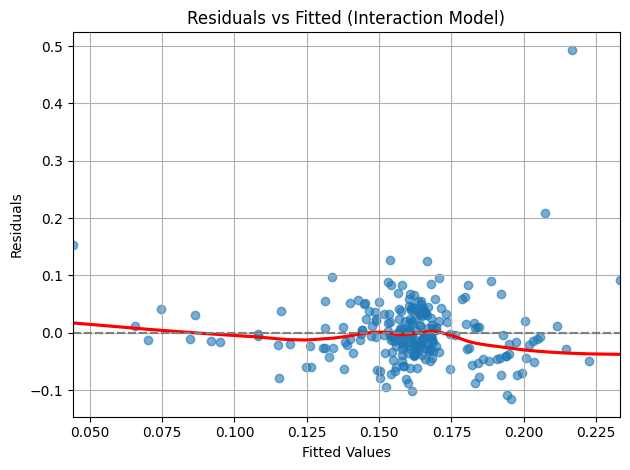

In [ ]:
# Fit interaction model
model_int = smf.ols('tip_pct ~ total_bill * C(smoker)', data=tips).fit()

# Add fitted values and residuals
tips['fitted_int'] = model_int.fittedvalues
tips['resid_int'] = model_int.resid

# Plot residuals vs fitted
sns.residplot(x='fitted_int', y='resid_int', data=tips, lowess=True,
              scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})
plt.title('Residuals vs Fitted (Interaction Model)')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.axhline(0, color='gray', linestyle='--')
plt.grid(True)
plt.tight_layout()
plt.show()

### Interpretation :

- In this model, the errors (residuals) are spread out more evenly across the predicted values. That’s a good sign — it means the model isn’t consistently making bigger mistakes at certain prediction levels.

- The red trend line is mostly flat, which tells us there’s no obvious pattern or curve in the residuals. That suggests the model is doing a solid job capturing the relationship between total bill and tip percentage across smoker groups.

### Comparison :

The interaction model fits the data better. It reduces curvature and stabilizes error spread, making it a more reliable choice for understanding how tipping behavior varies with total bill and smoker status.

### D2.
If your response was tip instead of tip_pct, do diagnostics suggest re-expressing the outcome?

In [ ]:
# Fit additive model using raw tip
model_tip = smf.ols('tip ~ total_bill + C(smoker)', data=tips).fit()

# Extract residuals and fitted values
tips['fitted_tip'] = model_tip.fittedvalues
tips['resid_tip'] = model_tip.resid


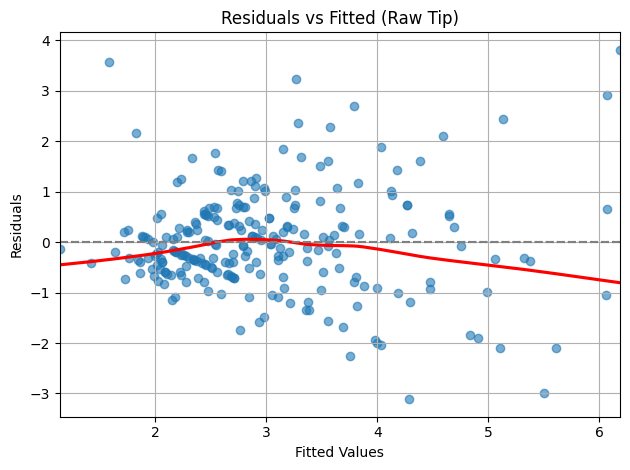

In [ ]:
sns.residplot(x='fitted_tip', y='resid_tip', data=tips, lowess=True,
              scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})
plt.title('Residuals vs Fitted (Raw Tip)')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.axhline(0, color='gray', linestyle='--')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Option 1: Use tip percentage
tips['tip_pct'] = tips['tip'] / tips['total_bill']
model_pct = smf.ols('tip_pct ~ total_bill + C(smoker)', data=tips).fit()

# Option 2: Use log-transformed tip
import numpy as np
tips['log_tip'] = np.log(tips['tip'])
model_log = smf.ols('log_tip ~ total_bill + C(smoker)', data=tips).fit()


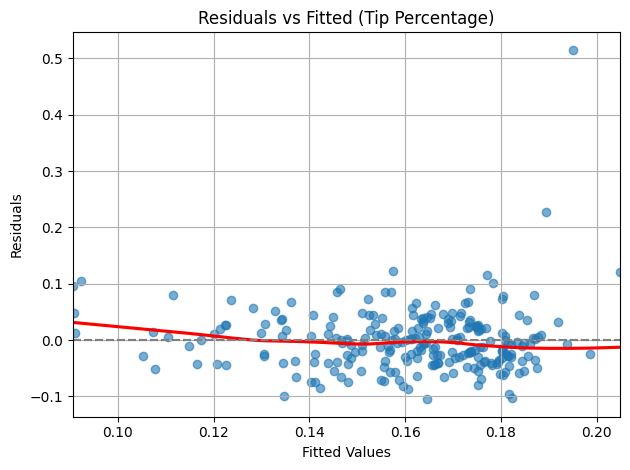

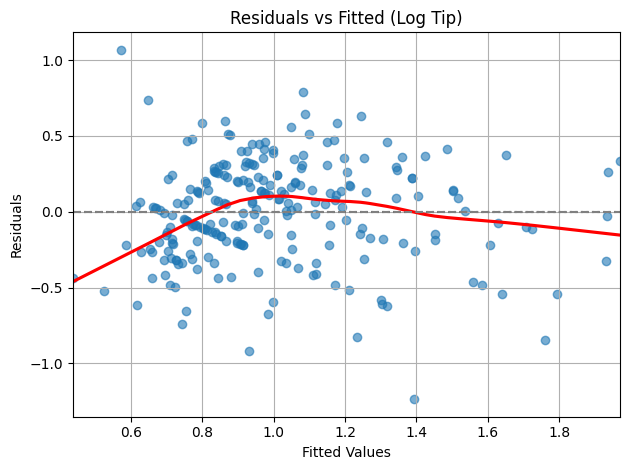

In [ ]:
# For tip_pct
tips['fitted_pct'] = model_pct.fittedvalues
tips['resid_pct'] = model_pct.resid

sns.residplot(x='fitted_pct', y='resid_pct', data=tips, lowess=True,
              scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})
plt.title('Residuals vs Fitted (Tip Percentage)')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.axhline(0, color='gray', linestyle='--')
plt.grid(True)
plt.tight_layout()
plt.show()

# For log_tip (optional)
tips['fitted_log'] = model_log.fittedvalues
tips['resid_log'] = model_log.resid

sns.residplot(x='fitted_log', y='resid_log', data=tips, lowess=True,
              scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})
plt.title('Residuals vs Fitted (Log Tip)')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.axhline(0, color='gray', linestyle='--')
plt.grid(True)
plt.tight_layout()
plt.show()


Using tip_pct instead of raw tip leads to a cleaner, more reliable model. It improves diagnostics, reduces bias, and makes comparisons across customers more meaningful.